In [38]:
from netCDFfunc.utility import get_data_by_date, get_anomaly_heatlevel, cropping, masking
from netCDF4 import Dataset
import numpy as np

import datetime as dt
from  tqdm.notebook import tqdm

import matplotlib.pyplot as plt

In [2]:
base_dir = '/Volumes/T7/AVHRR_OI_SST/v2.1/'

In [6]:
ds_in = get_data_by_date(base_dir=base_dir,
                         get_data_func=get_data_A,
                         var_name='sst',
                         start_date=(1982,1,1),
                         end_date=(2021,12,31))

  0%|          | 0/40 [00:00<?, ?it/s]

In [72]:
days = [31,28,31,30,31,30,31,31,30,31,30,31]
months = range(1,13)
anomallies = []
anomallies_year = dict()

for month, day_len in zip(months, days):
    for day in tqdm(range(1,day_len+1)):
        date = dt.date(1,month,day).strftime('%m%d')
        ds_ice = Dataset(f'/Volumes/T7/new_data/processed_data/processed_data_1_rok_ice/30_years_dataset_1_rok_ice_{date}.nc').variables['ice'][:].data[0]
        ds_mean = Dataset(f'/Volumes/T7/new_data/processed_data/processed_data_1_rok_avg/30_years_dataset_1_rok_{date}.nc').variables['avgsst'][:].data[0]
        ds_pctl = Dataset(f'/Volumes/T7/new_data/processed_data/processed_data_1_rok_pctl/30_years_dataset_1_rok_90_percentile_{date}.nc').variables['pctlsst'][:].data[0]
        
        for i, sst in enumerate(ds_in[(month, day)]):
            sst = cropping(sst, 'rok')
            if not anomallies_year.get(i+1982):
                anomallies_year[i+1982] = [get_anomaly_heatlevel(sst, ds_ice, ds_mean, ds_pctl)]
            else :
                anomallies_year[i+1982].append(get_anomaly_heatlevel(sst, ds_ice, ds_mean, ds_pctl))

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

In [57]:
anomallies = np.array(anomallies)
anomallies = anomallies.flatten()
np.place(anomallies, anomallies[:] == -50, np.nan)

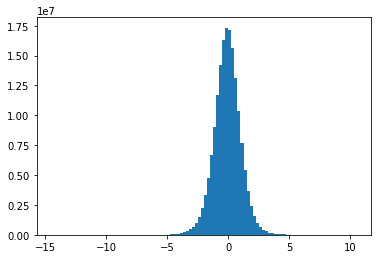

In [58]:
plt.hist(anomallies, bins=100)
plt.show()

In [59]:
np.nanmin(anomallies)

-14.481999

In [60]:
np.nanmax(anomallies)

10.4660015

In [99]:
mins = []
maxs = []
means = []
medians = []

for year in range(1982,2022):
    anomally_year = np.array(anomallies_year[year])
    anomally_year = anomally_year.flatten()
    np.place(anomally_year, anomally_year[:] == -50, np.nan)
    mins.append(np.nanmin(anomally_year))
    maxs.append(np.nanmax(anomally_year))
    means.append(np.nanmean(anomally_year))

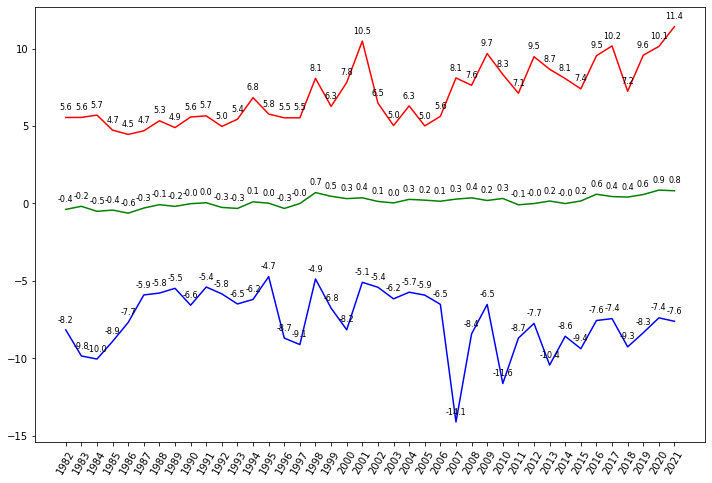

In [112]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)

ax.plot(mins,'b',maxs,'r', means,'g')
ax.set_xticks(range(40))
ax.set_xticklabels(range(1982,2022), rotation=60)

for i, v in enumerate(mins):
    ax.text(i, v+.5, "%0.1f" %v, ha="center", fontsize=8)
for i, v in enumerate(maxs):
    ax.text(i, v+.5, "%0.1f" %v, ha="center", fontsize=8)
for i, v in enumerate(means):
    ax.text(i, v+.5, "%0.1f" %v, ha="center", fontsize=8)
    
plt.show()